In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

file = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file += os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-crime/london_crime_by_lsoa.csv


In [5]:
file = pd.read_csv('../input/london-crime/london_crime_by_lsoa.csv')

df = pd.DataFrame(file)

df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
df.tail(15)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490589,E01003371,Merton,Drugs,Possession Of Drugs,0,2015,4
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490591,E01000193,Barnet,Criminal Damage,Other Criminal Damage,0,2016,2
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7
13490593,E01004531,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2


In [30]:
def line_plotter(msg: str, x_vals, y_vals):
    
    plt.plot(x_vals, y_vals)
    
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title(msg)
    
    plt.show()
    
    return

In [17]:
def hist_plotter(x_vals):
    
    _, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)
    
    axs.hist(x_vals)
    
#     axs.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title(msg)
    
    plt.show()
    
    return

In [11]:
def heat_map_plotter(msg: str, marks, x_vals, y_vals):
    
    plt.xticks(ticks=np.arange(len(x_vals)),labels=x_vals,rotation=90)
    plt.yticks(ticks=np.arange(len(y_vals)),labels=y_vals)
    
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title(msg)
    
    plt.imshow(marks, cmap='cool',interpolation="nearest")
    
    return

In [26]:
borough = df['borough'].to_numpy()
lsoa_code = df['lsoa_code'].to_numpy()
major_category = df['major_category'].to_numpy()
minor_category = df['minor_category'].to_numpy()
values = df['value'].to_numpy()
month = df['month'].to_numpy()
year = df['year'].to_numpy()

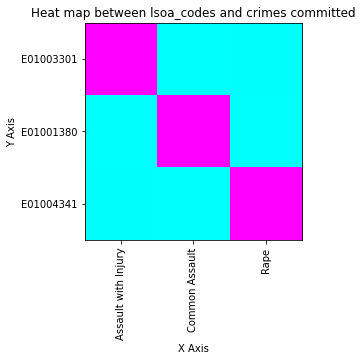

In [24]:
msg = "Heat map between lsoa_codes and crimes committed"
# corr = df.corr()
corr = df.corr()
heat_map_plotter(msg, corr, minor_category[-20:], lsoa_code[-20:])

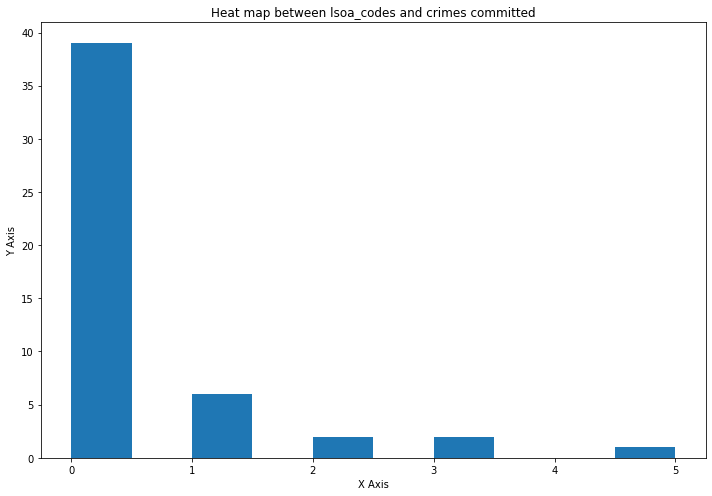

In [18]:
last_50_vals = values[-50:]

hist_plotter(last_50_vals)

In [22]:
marks = [values[-20:]]
print(marks)
print(corr)

[array([1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])]
          value          year         month
value  1.000000 -2.198152e-03  1.821179e-03
year  -0.002198  1.000000e+00 -1.209409e-14
month  0.001821 -1.209409e-14  1.000000e+00


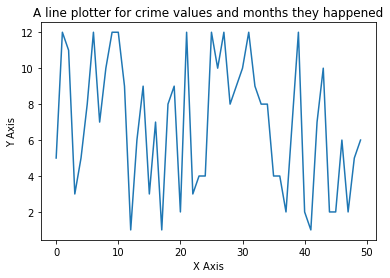

In [36]:
msg1 = "A line plotter for crime values and months they happened"
line_plotter(msg1, [i for i in range(len(month[-50:]))], month[-50:])